<a href="https://colab.research.google.com/github/JaredKeithAveritt/AI_methods_in_advanced_materials_research/blob/main/Week_2/02_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Data with Machine Learning
Another common task in data analysis is clustering data into groups using automated algorithms. There are machine learning algorithms to iteratively collects points together and form clusters. These are generally classified as _unsupervised_ learning because there is no direct input (data or otherwise) from the user required.

To demonstrate, we will go through an example here. The point is to show how algorithms can learn features about data that we care about.

The [Scikit Learn](https://scikit-learn.org/stable/user_guide.html) is a toolkit we can use to quickly generate a few clusters of data in two dimensions and we demonstrate how to do that here:



'make_blobs' is a function provided by the scikit-learn library in Python. It is a utility function for generating synthetic datasets with clusters of points. The function is commonly used for testing and illustrating clustering algorithms.

(400, 2) (400,) (4, 2)


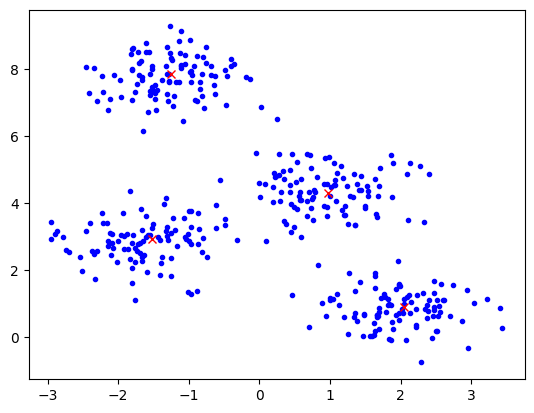

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import time
import IPython.display as ipydis

# Set the number of data points and clusters
npoints = 400
N = 4

# Generate synthetic data with make_blobs
x, cluster_labels, cluster_centers = make_blobs(
    n_samples=npoints,
    centers=N,
    cluster_std=0.60,
    random_state=0,
    return_centers=True
)

# Display the shapes of the generated data arrays
print(x.shape, cluster_labels.shape, cluster_centers.shape)

# Plot the data points in blue
plt.plot(x[:, 0], x[:, 1], 'b.')

# Plot the cluster centers in red (marked with 'rx')
plt.plot(cluster_centers[:, 0], cluster_centers[:, 1], 'rx')

# Show the plot
plt.show()


Here `x` is an array of the data points, `cluster_labels` is an array which labels to which group each point belongs (0-3), `cluster_centers` is a list of the 4 cluster center points.


# K-means

_K-means_ is a straightforward method to understand that follows these steps:
1. Given a set of points $x$, randomly select $N$ center points, or centroids, $c$.
2. Calculate the distance of each point to each centroid.
3. Assign points the label $0$ to $(N-1)$ based on to which centroid they are closest.
4. Calculate new centroids based on the center of mass of each cluster of points.
5. Repeat Steps 2-4 until one of these occurs:
   - centroids no longer shift more than some defined distance, $\delta$
   - no points change their label
   - some predefined iteration max, $N_{iter}$, is reached


In [2]:
def initialize_centroids(x,N):
   x_indices = np.random.choice(np.arange(0,x.shape[0]),N)
   centroids = x[x_indices]
   return centroids

def get_new_centroids(x, labels, N):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([x[labels==k].mean(axis=0) for k in range(N)])
# This creates a new numpy array containing the centroids for each cluster.
# It uses a list comprehension to iterate over each cluster index k from 0 to N-1.
# For each cluster k, it selects the data points from array x where the corresponding label in array labels equals k.
# It then calculates the mean along the rows (axis=0) of these selected data points, effectively finding the centroid for cluster k.
# The result is an array containing the centroids for all N clusters.
# In summary, this function takes a set of data points (x), their cluster labels (labels), and the total number of clusters (N), and it computes the centroids for each cluster based on the mean of the data points assigned to that cluster.

In [3]:
# distance is sqrt( (x - x')**2 + (y - y')**2 )
def assign_labels(x,c):
   # centroids are shape [N,2]
   # x are shape [npoints,2]
   # add middle index to centroids to properly broadcast in math operations
   c = c[:,np.newaxis,:] # [N,1,2]

   # calculate (x - x')**2 and (y - y')**2
   # x is shape [npoints,2], c is [N,1,2] results in an array of shape: [N,npoints,2]
   dist2 = (x - c)**2

   # calculate (x - x')**2 + (y - y')**2
   dist2 = dist2.sum(axis=2) # [N,npoints]

   # out of the N distances, return the index (0-(N-1)) of the one that is the minimum.
   label = np.argmin(dist2,axis=0) # [npoints]

   return label

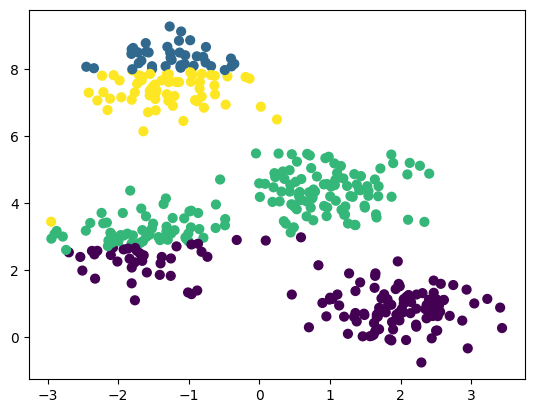

In [4]:
c = initialize_centroids(x,N)
l = assign_labels(x,c)
plt.scatter(x[:, 0], x[:, 1], c=l, s=40, cmap='viridis')

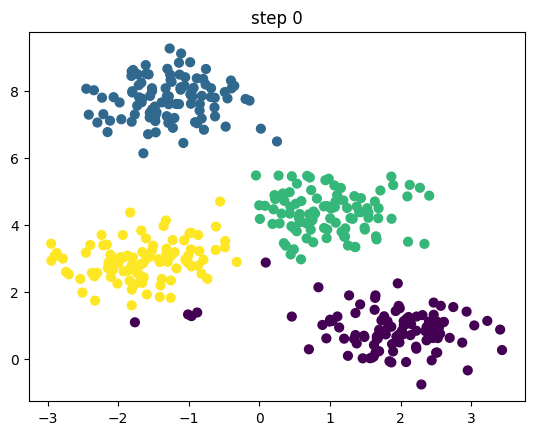

In [6]:
# Set the convergence threshold
delta = 0.01

# Initialize centroids using a function named initialize_centroids (not provided in the code snippet)
last_centroids = initialize_centroids(x,N)

# Assign labels to data points based on the initial centroids
last_labels = assign_labels(x,last_centroids)

# Step 0: Plot the initial data points with colors based on initial labels
# s is marker size, cmap is color map
step = 0
plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
plt.title('step %d' % -1)
plt.show()
# Pause for 1 second to visualize the initial plot
time.sleep(1)
# Clear the output for a clean display in the notebook
ipydis.clear_output(wait=True)

# Calculate new centroids and reassign labels
centroids = get_new_centroids(x,last_labels,N)
labels = assign_labels(x,centroids)

# test if centroids have stopped moving
if np.all((last_centroids - centroids) < delta):
   print('centroids unchanged as of step %d' % step)
   # Algorithm convergence, done
elif np.all(labels == last_labels):
   print('point labels unchanged as of step %d' % step)
   # Algorithm convergence, done

else:
   # Update labels and centroids for the next iteration
   last_labels = labels
   last_centroids = centroids

# Plot the data points with colors based on the updated labels

plt.scatter(x[:, 0], x[:, 1], c=last_labels, s=40, cmap='viridis')
plt.title('step %d' % step)
plt.show()


